<a href="https://colab.research.google.com/github/InutilemMachina/DataSciRepo/blob/main/ch9_1_ClusteringAlgoritmhs_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 2)

rng = 1234

import numpy as np

# **Clustering Algoritmhs**

A common pipeline will be:

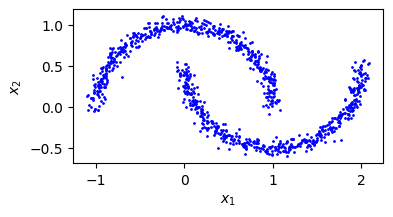

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans.labels_ = [4 1 3 4 2] (first five items)
kmeans.cluster_centers_ = [[ 0.19621663 -0.01919858]
 [ 1.83267373  0.02775113]
 [-0.72181004  0.57466706]
 [ 0.39424757  0.82340424]
 [ 1.01713056 -0.26223904]]  (first five items)


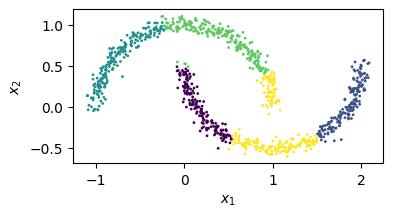

In [ ]:
# 1. Make data:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=rng)  # y labels are basically unnecesary, since clustering is un-supervised learning.

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=rng)
y_pred = kmeans.fit_predict(X)

# 4. Print infos
print(f"kmeans.labels_ = {kmeans.labels_[:5]} (first five items)")
print(f"kmeans.cluster_centers_ = {kmeans.cluster_centers_[:5]}  (first five items)")

# 5. Assign new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

Additional section after each clustering may apply.

# $k$-means

initialize randomly k centroids.
- label instances.
- update centroids.
- repeat.

May converge to a local optimum. mitigate this risk by improving the centroid initialization:
- you may know in advance approximately the place of centroids.
- run algorithm multiple times with different initializations. fing the best solution, where the performance metrix *inertia* is best. (`score()` method returns negative inertia to obey SKLearn's "greater is better" rule.)
- k-mean++ select centroids far from each other. The `KMeans` class uses this initialization method by default.

## Limits of $k$-means
*  you need to run it several times to avoid suboptimal solutions
* you need to specify the number of clusters

does not behave very well when:

* the clusters have varying sizes
* different densities,
*  nonspherical shapes. In such cases, look for Gaussian Mixture Models

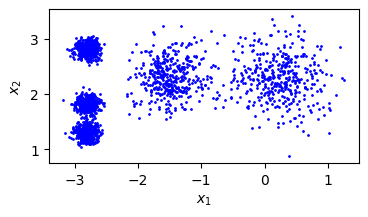

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


kmeans.labels_ = [2 2 4 2 1] (first five items)
kmeans.cluster_centers_ = [[-2.80731345  1.30279604]
 [-1.4613283   2.31199585]
 [ 0.24339526  2.28803838]
 [-2.79383574  2.80721336]
 [-2.78994176  1.81266706]]  (first five items)


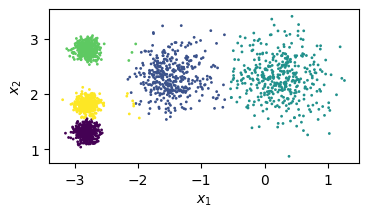

In [ ]:
# 1. Make data:
import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5 ,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=rng)

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=rng)
y_pred = kmeans.fit_predict(X)

# 4. Print infos
print(f"kmeans.labels_ = {kmeans.labels_[:5]} (first five items)")
print(f"kmeans.cluster_centers_ = {kmeans.cluster_centers_[:5]}  (first five items)")

# 5. Assign new instances by hard clustering
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

### Find the optimal number of clusters

Does not work by choosing the lower inertia because as $k$ increases, the inertia decreases.

**1. Plot inertia as a function of $k$**, which curve often contains an inflection point.

**2. Silhouette score** is the mean silhouette coefficient over all the instances.
An instance’s silhouette coefficient:

$$
\frac{b-a}{max(a,b)},
$$

where

$a$ is mean distance to the other instances in the same cluster (the mean intra-cluster distance)

$b$ is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster)

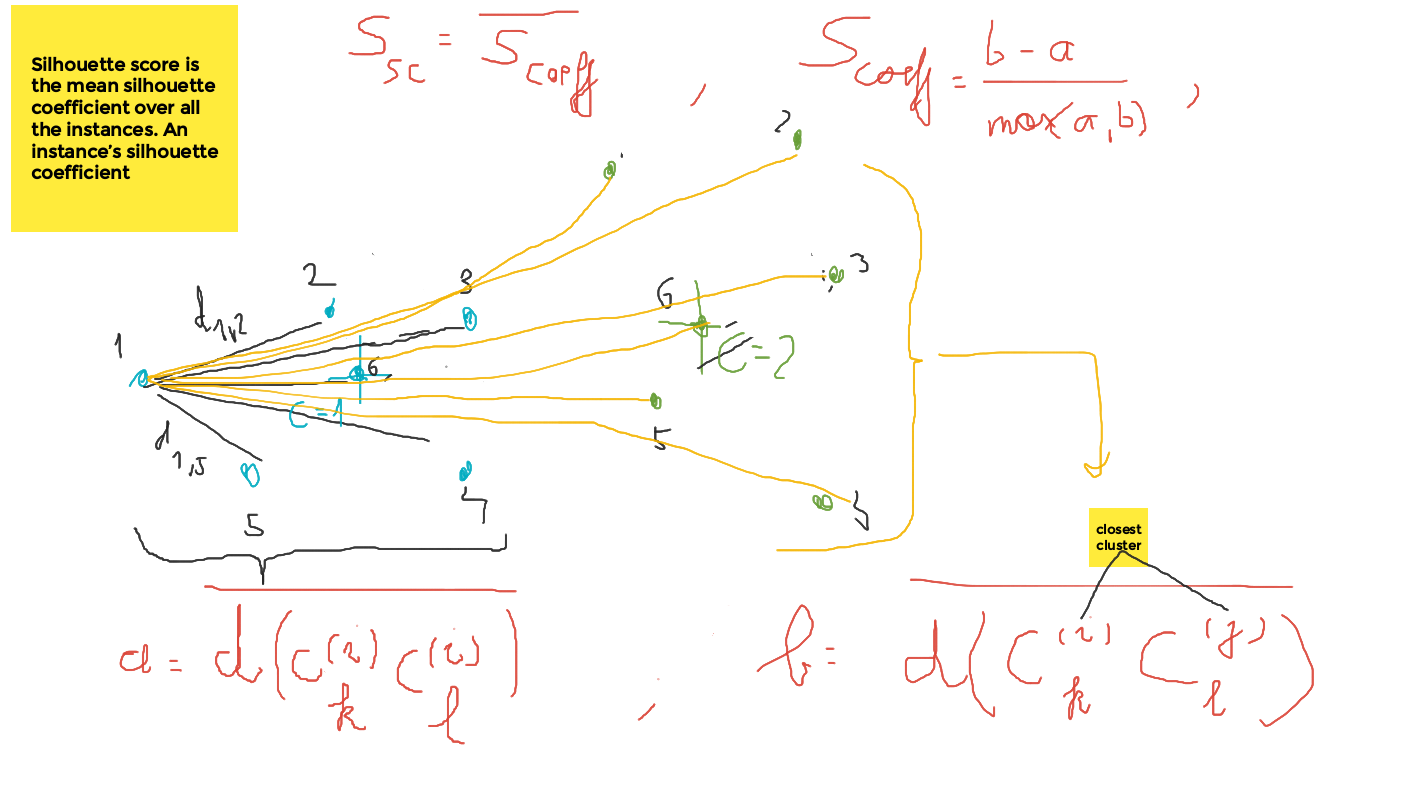

The silhouette coefficient can vary between –1 and +1.
* +1: instance is well inside its own cluster
* 0: it is close to a cluster boundary
* -1: instance may have been assigned to the wrong cluster.

**3. Silhouette Diagram**. Plot every instance’s silhouette coefficient sorted by the clusters they are assigned to and by the value of the coefficient.

The shape’s height indicates the number of instances in the cluster, and

its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).

The dashed lines represent the mean silhouette score for each number of
clusters.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

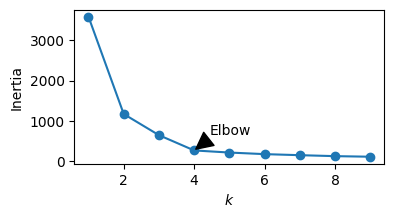

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=rng).fit(X)    for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("Elbow", xy=(4, inertias[3]), xytext=(4.45, 650),  arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

Text(0, 0.5, 'Silhouette score')

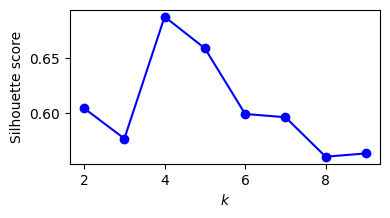

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

silhouette_scores = [silhouette_score(X, model.labels_)     for model in kmeans_per_k[1:]]

plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

we see that k = 4 is the best choice, k=5 is also very good

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

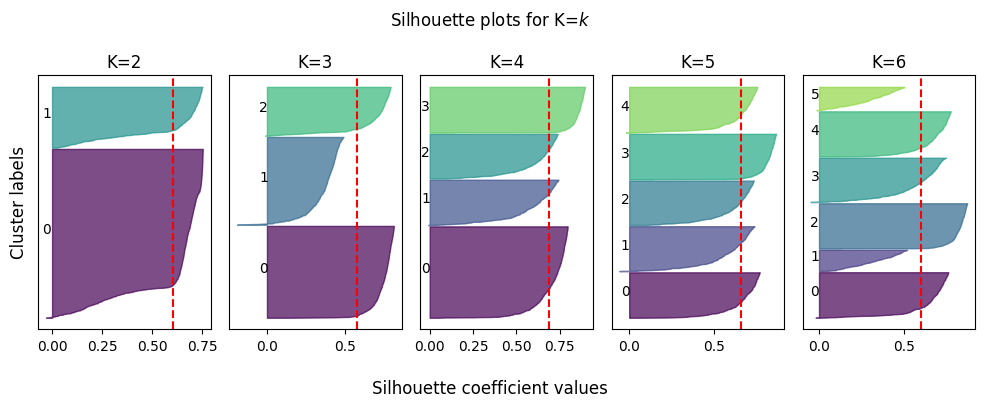

In [ ]:
from sklearn.metrics import silhouette_samples

range_of_k = [2, 3, 4, 5, 6]  # Define a range of k values to try

fig, axs = plt.subplots(1, len(range_of_k), figsize=(10, 4))  # Create subplots for silhouette plots

for i, k in enumerate(range_of_k):
    # Fit K-Means clustering with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=rng)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette scores for each sample
    silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot for the silhouette plot
    ax = axs[i]

    # Silhouette plot ranges for individual clusters
    y_lower = 10
    for j in range(k):
        # Aggregate the silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == j]

        # Sort the silhouette values
        ith_cluster_silhouette_values.sort()

        # Calculate the size of the jth cluster
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Fill the silhouette shapes for cluster j
        color = plt.cm.viridis(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"K={k}")

    # Vertical line for average silhouette score across all clusters
    silhouette_avg = np.mean(silhouette_values)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the y-axis labels/ticks

plt.suptitle(f"Silhouette plots for K=$k$")
fig.supxlabel("Silhouette coefficient values")
fig.supylabel("Cluster labels")
plt.tight_layout()
plt.show()


#DBSCAN

*Density-based spatial clustering of applications with noise*

If all the clusters are well separated by low-density regions. They don't have to be spherical shaped.

- For each instance how many instances are within a small distance ε
- If an instance has at least min_samples  in its ε-neighborhood, it is considered a core instance.
-  All instances in the neighborhood of a core instance belong to the same cluster. may include other core instances.
- Any instance that is not a core instance and does not have one in its neighbor‐
hood is considered an **anomaly**.

DBSCAN class does not have a `predict()` method, although it has a `fit_predict()` method. It cannot predict which cluster a new instance belongs to, but training e.g. a `KNeighborsClassifier` helps us further.

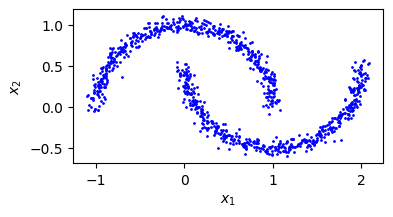

dbscan.labels_ = [0 0 1 0 1] (first five items)
dbscan.core_sample_indices_ = [0 1 2 3 4]  (first five items)
dbscan.components_ = [[ 0.56511444 -0.40482824]
 [ 1.93099431  0.43547155]
 [ 0.59879501  0.87453713]
 [ 1.1561179  -0.43129294]
 [-0.91741158  0.38912381]]  (first five items)


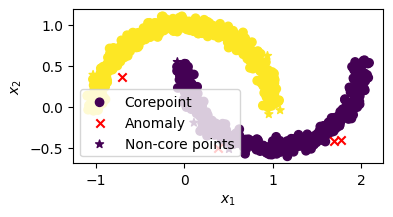

In [ ]:
# 1. Make data:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=rng)  # y labels are basically unnecesary, since clustering is un-supervised learning.

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
dbscan

# 4. Print infos
dbscan.labels_  # a cluster index equal to –1 means, they are considered as anomalies
dbscan.core_sample_indices_  # The indices of the core instances
dbscan.components_  # the core instances themselves
print(f"dbscan.labels_ = {dbscan.labels_[:5]} (first five items)")
print(f"dbscan.core_sample_indices_ = {dbscan.core_sample_indices_[:5]}  (first five items)")
print(f"dbscan.components_ = {dbscan.components_[:5]}  (first five items)")


# 5. Assign new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

# 6. Plot the classified data:
core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_mask[dbscan.core_sample_indices_] = True
anomalies_mask = dbscan.labels_ == -1
non_core_mask = ~(core_mask | anomalies_mask)

cores = dbscan.components_
anomalies = X[anomalies_mask]
non_cores = X[non_core_mask]

fig, ax = plt.subplots()
plt.scatter(cores[:, 0], cores[:, 1],  c=dbscan.labels_[core_mask], marker='o', label = 'Corepoint')  #  core points with circular markers ('o') colored according to their cluster labels.
plt.scatter(anomalies[:, 0], anomalies[:, 1],  c="r", marker="x", label = 'Anomaly')  #  This plots the anomalies with red 'x' markers, labeling them as anomalies.
plt.scatter(non_cores[:, 0], non_cores[:, 1],  c=dbscan.labels_[non_core_mask], marker="*", label = 'Non-core points')  #  This plots the non-core points with small dot markers ('.') colored based on their cluster labels.
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# Agglomerative clustering

- a binary tree of clusters, where the leaves are the individual instances.
- can capture clusters of various shapes;
- produces a flexible and informative cluster tree instead of forcing you to - - choose a particular cluster scale,
- can be used with any pairwise distance


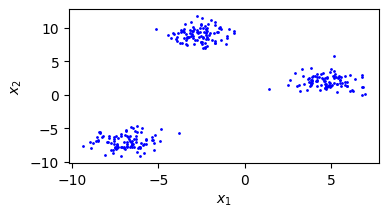

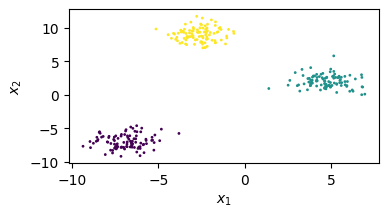

In [ ]:
# 1. Make data:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model:
from sklearn.cluster import AgglomerativeClustering
# model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)  # setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=None, distance_threshold=12)  # setting distance_threshold=0 ensures we compute the full tree.
model.fit(X)

# 4. Print infos
cluster_labels = model.labels_
# 'children_',
# 'labels_',
# 'n_clusters_',
# 'n_connected_components_',
# 'n_features_in_',
# 'n_leaves_']

# 5. Assign new instances
# Option A: Use the original clustering: If you have the original data and the clustering model,
# you can use the original clustering to assign new data points to clusters.
# This is because the clustering model assigns each data point to a cluster based
# on its proximity to the cluster centers.
# Use the original clustering to predict new data points:
# X_new = [[1, 1], [3, 3]]
# y_new = model.fit_predict(X_new)

# # Option B: Re-fit the model: If you have new data points that you want to cluster,
# # you can re-fit the AgglomerativeClustering model with the new data points included
# X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
# new_labels = agg.fit_predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

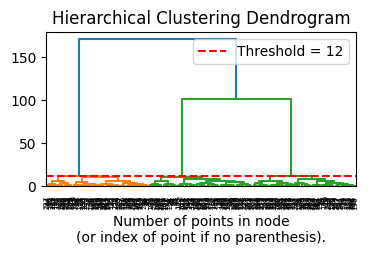

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot the corresponding dendrogram
distance_threshold = 12
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level")  # , p=3 # plot the top three levels of the dendrogram
plt.axhline(y=distance_threshold, color='r', linestyle='--', label=f'Threshold = {distance_threshold}')
plt.xlabel("Number of points in node\n(or index of point if no parenthesis).")
plt.legend()
plt.show()

# BIRCH

*Balanced iterative reducing and clustering using hierarchies*

Infos:
- Designed specifically for very large datasets, which doesn't fit in the memory, hence it's an incremental approach.
- Builds a tree structure, i.e., it is a hierarchical clustering method.
- Doesn't work well with non-spherical shapes. Handles outliers well.

Works:
- Builds a *Clustering Feature* (CF) tree while scanning the data. Each entry, (vector) in the CF-tree represents a cluster of objects and is characterized by a triple of $(N,LS,SS)$, where:

    - $N$ - number of data points in the cluster,
    - $LS$ - linear sum of the $N$ points,
    - $SS$ - square sum of the $N$ points,

    given $N$ points with $d$-dimensions in a cluster, $X_i$

- The CF tree is a height balanced tree with parameters:
    - $B$ - branching factor,
    - $T$ - threshold

Structure:
- Each **non**-leaf node contains at most $B$ entries of the form $[CF_i, child_i]$, where $child_i$ is a pointer to its $i$th child node and $CF_i$ is the CF of the subcluster represented by this child.
- A leaf node contains at most $L$ entries, each of them in form of $[CF_i]$, for $i = 1,\dots,L$.
- It also has two pointers, $prev$ and $next$
- A leaf node also represents a cluster, with subclusters, but all entries satisfy a *threshold requirement*, $T$, such that the radius is smaller than $T$.

For a new point entering the root, it is merged with the subcluster closest to it and the linear sum, squared sum and the number of samples of that subcluster are updated. This is done recursively till the properties of the leaf node are updated.


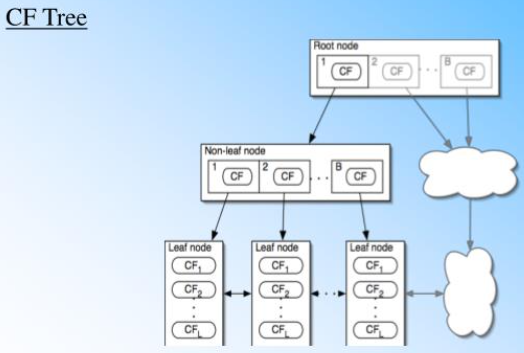


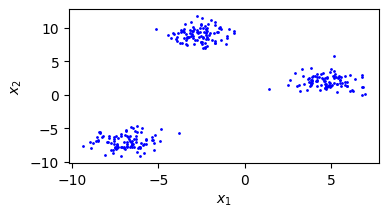

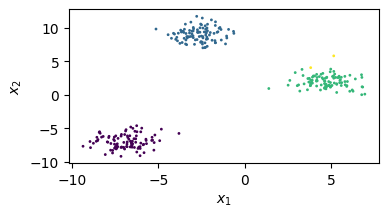

In [ ]:
# 1. Make data:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model using Birch clustering:
from sklearn.cluster import Birch
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(X)

# 4. Print infos
cluster_labels = model.labels_

# 5. Assign new instances
X_new = [[1, 1], [3, 3]]
y_new = model.fit_predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# Mean-shift

`MeanShift` clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.


It places circles centered on each instance; computes the mean of all the instances located within and shifts the circle so that it is centered on the mean. It iterates mean-shifting until circles stop moving.

Circles moves in direction of higher density,

Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster.

Similarly to DBSCAN, it can find any number of clusters of any shape,
But unlike DBSCAN, mean-shift tends to chop clusters into pieces when they have internal density variations.

Only one hyperparameter, the radius of the circles, called the bandwidth.
Nnot suited for large datasets dut to high numerical complexity.

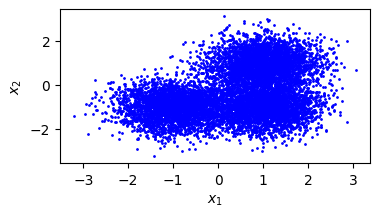

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_mean_shift.py:254: UserWarning: Binning data failed with provided bin_size=1.022483, using data points as seeds.
  warnings.warn(


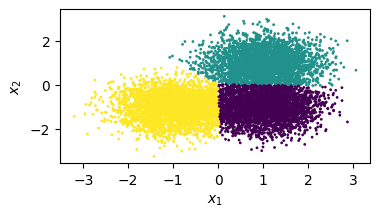

In [ ]:
# 1. Make data:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model using Birch clustering:
from sklearn.cluster import MeanShift, estimate_bandwidth
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model.fit(X)

# 4. Print infos
labels = model.labels_
cluster_centers = model.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# 5. Assign new instances
X_new = [[1, 1], [3, 3]]
y_new = model.fit_predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

# Affinity propagation

AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given.

Affinity Propagation can be interesting as it chooses the number of clusters based on the data provided. For this purpose, the two important parameters are the preference, which controls how many exemplars are used, and the damping factor which damps the responsibility and availability messages to avoid numerical oscillations when updating these messages.

- The main drawback of Affinity Propagation is its complexity.
- Number of clusters is determined during training.
- Deals with clusters of different sizes.  
- Tends to choose exemplars located near the center of clusters, similar to $k$-means.

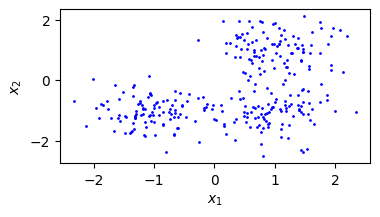

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:53: UserWarning: All samples have mutually equal similarities. Returning arbitrary cluster center(s).
  warnings.warn(


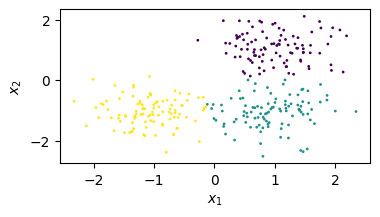

In [ ]:
# 1. Make data:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model using Birch clustering:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(preference=-50, random_state=0)
model.fit(X)

# 4. Print infos
from sklearn import metrics
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

# 5. Assign new instances
X_new = [[1, 1], [3, 3]]
y_new = model.fit_predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

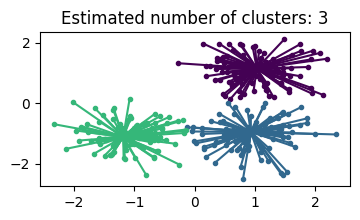

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Spectral clustering
This algorithm first creates a low-dimensional embedding from a similarity matrix between the instances, which reduces the dimensionality of the matrix. Then, it uses another clustering algorithm in this low-dimensional space. Scikit-Learn’s implementation uses k-means for this purpose. Spectral clustering is capable of capturing complex cluster structures and can also be used to cut graphs, such as identifying clusters of friends on a social network. However, spectral clustering does not scale well to large numbers of instances and does not behave well when the clusters have very different sizes.

Spectral clustering is a type of clustering algorithm that uses the **eigenvectors** of a similarity matrix to perform clustering. It is particularly useful when the data points are not easily separable in the original space, but can be separated in a transformed space. Spectral clustering has been applied to a wide range of problems, including image segmentation, document clustering, and community detection in social networks¹.

Advantages of spectral clustering include its ability to handle high-dimensional datasets with many features, its ability to cluster data with irregularly shaped clusters, and its ability to handle mixed data types such as categorical variables¹. However, spectral clustering can be relatively slow compared to other clustering algorithms like k-means clustering, and it is less popular and well-studied than other clustering algorithms like k-means and hierarchical clustering. Additionally, spectral clustering is not intuitive or easy to explain.

In summary, spectral clustering is a powerful tool for clustering data that is not easily separable in the original space. It has many advantages over other clustering algorithms, but also has some disadvantages. Spectral clustering is best suited for high-dimensional datasets without an obvious outcome variable to predict.

The present version of SpectralClustering requires the **number of clusters to be specified in advance**. It works well for a small number of clusters, but is not advised for many clusters.

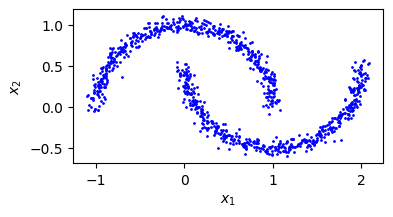

model.labels_ = [1 1 0 1 0] (first five items)


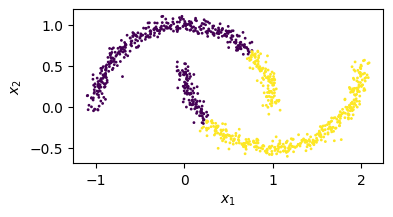

In [ ]:
# 1. Make data:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=rng)  # y labels are basically unnecesary, since clustering is un-supervised learning.

# 2. Plot the unclassified data:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='blue', s=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

# 3. Import and fit a model:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, assign_labels='discretize', random_state=0)
y_pred = model.fit_predict(X)

# 4. Print infos
print(f"model.labels_ = {model.labels_[:5]} (first five items)")

# 5. Assign new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
# model.predict(X_new)

# 6. Plot the classified data:
fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()